In [1]:
from __future__ import print_function

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
titanic['Fare'] = np.log(titanic['Fare'] + 1)
titanic['Cabin_section'] =titanic['Cabin'].astype(str).str[0]

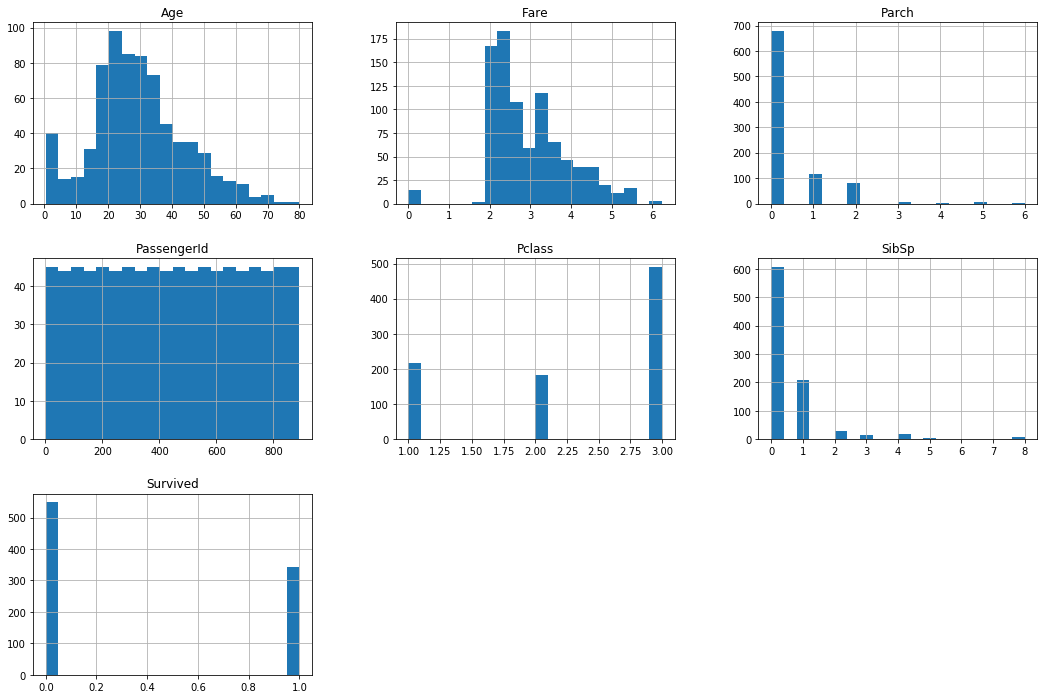

In [6]:
fig = titanic.hist(bins=20, figsize=(18,12),xlabelsize=10)

In [7]:
survived = titanic[titanic.Survived == 1]
died = titanic[titanic.Survived == 0]

In [8]:
display(survived.describe())
display(died.describe())

PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   342.000000     342.0  342.000000  290.000000  342.000000  342.000000   
mean    444.368421       1.0    1.950292   28.343690    0.473684    0.464912   
std     252.358840       0.0    0.863321   14.950952    0.708688    0.771712   
min       2.000000       1.0    1.000000    0.420000    0.000000    0.000000   
25%     250.750000       1.0    1.000000   19.000000    0.000000    0.000000   
50%     439.500000       1.0    2.000000   28.000000    0.000000    0.000000   
75%     651.500000       1.0    3.000000   36.000000    1.000000    1.000000   
max     890.000000       1.0    3.000000   80.000000    4.000000    5.000000   

             Fare  
count  342.000000  
mean     3.367015  
std      0.985096  
min      0.000000  
25%      2.600836  
50%      3.295837  
75%      4.060443  
max      6.240917

PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   549.000000     549.0  549.000000  424.000000  549.000000  549.000000   
mean    447.016393       0.0    2.531876   30.626179    0.553734    0.329690   
std     260.640469       0.0    0.735805   14.172110    1.288399    0.823166   
min       1.000000       0.0    1.000000    1.000000    0.000000    0.000000   
25%     211.000000       0.0    2.000000   21.000000    0.000000    0.000000   
50%     455.000000       0.0    3.000000   28.000000    0.000000    0.000000   
75%     675.000000       0.0    3.000000   39.000000    1.000000    0.000000   
max     891.000000       0.0    3.000000   74.000000    8.000000    6.000000   

             Fare  
count  549.000000  
mean     2.710095  
std      0.869085  
min      0.000000  
25%      2.180892  
50%      2.442347  
75%      3.295837  
max      5.575949

We can see that approximately a third of passengers survived

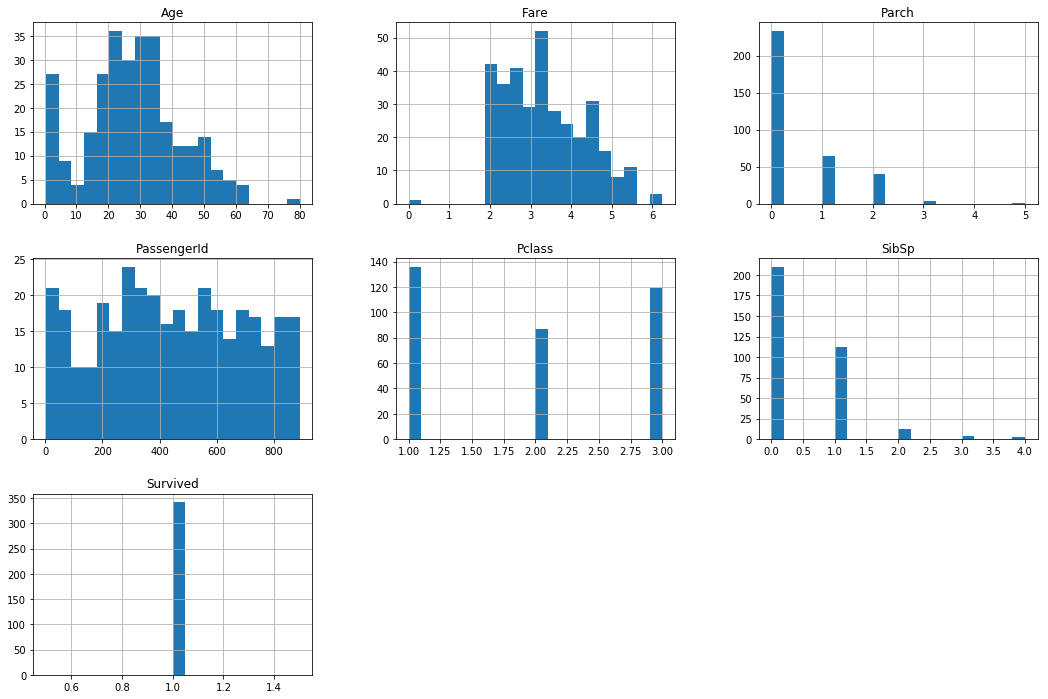

In [9]:
fig = survived.hist(bins=20, figsize=(18,12),xlabelsize=10)

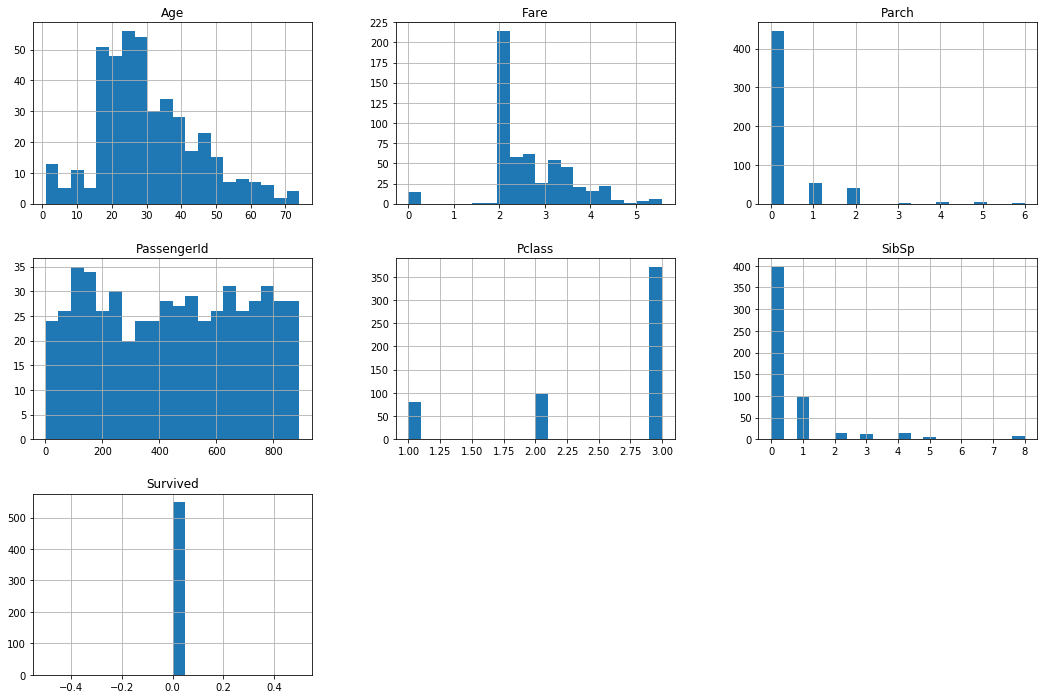

In [10]:
fig = died.hist(bins=20, figsize=(18,12),xlabelsize=10)

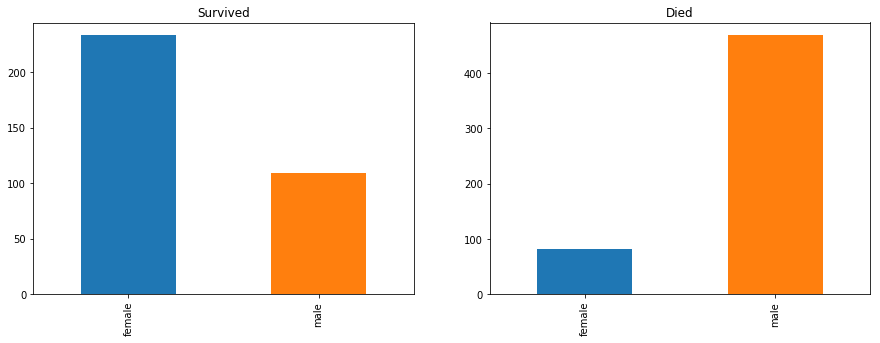

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
fig = survived['Sex'].value_counts(sort=False).plot.bar()
fig.set_title("Survived")

plt.subplot(1, 2, 2)
fig = died['Sex'].value_counts(sort=False).plot.bar()
fig.set_title("Died")

plt.show()

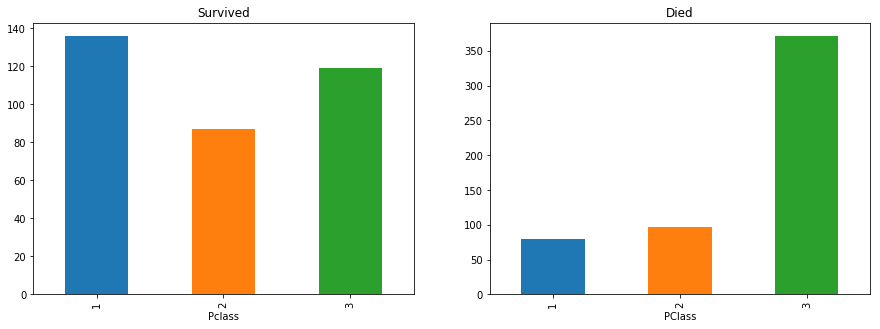

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
fig = survived['Pclass'].value_counts(sort=False).plot.bar()
fig.set_title("Survived")
fig.set_xlabel("Pclass")

plt.subplot(1, 2, 2)
fig = died['Pclass'].value_counts(sort=False).plot.bar()
fig.set_title("Died")
fig.set_xlabel("PClass")

plt.show()

Around half of the females survived while less than a fifth of males survived.
Sex seems to be a really good predictor of survival

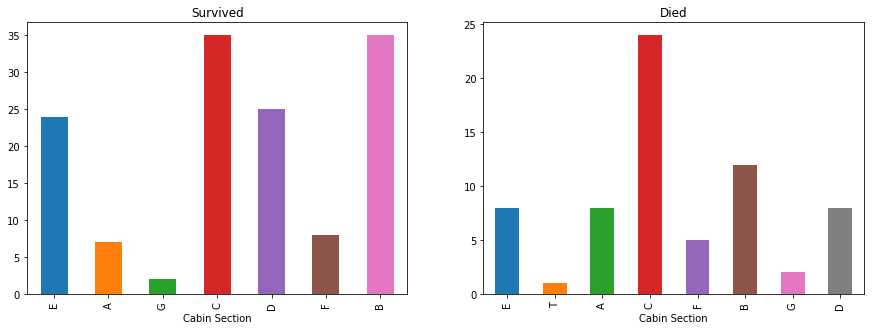

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2,1)
fig = survived[survived['Cabin'].notnull()]['Cabin_section'].value_counts(sort=False).plot.bar()
fig.set_title("Survived")
fig.set_xlabel("Cabin Section")

plt.subplot(1, 2, 2)
fig = died[died['Cabin'].notnull()]['Cabin_section'].value_counts(sort=False).plot.bar()
fig.set_title("Died")
fig.set_xlabel("Cabin Section")

plt.show(fig)

In [14]:
survived[survived['Cabin'].notnull()].count()

PassengerId      136
Survived         136
Pclass           136
Name             136
Sex              136
Age              125
SibSp            136
Parch            136
Ticket           136
Fare             136
Cabin            136
Embarked         134
Cabin_section    136
dtype: int64

In [15]:
died[died['Cabin'].notnull()].count()

PassengerId      68
Survived         68
Pclass           68
Name             68
Sex              68
Age              60
SibSp            68
Parch            68
Ticket           68
Fare             68
Cabin            68
Embarked         68
Cabin_section    68
dtype: int64

It seems like the passengers that had a cabin indicated were more likely to survive.
Out of those that were in cabins starting with the letter B. Around 2 thirds survived.

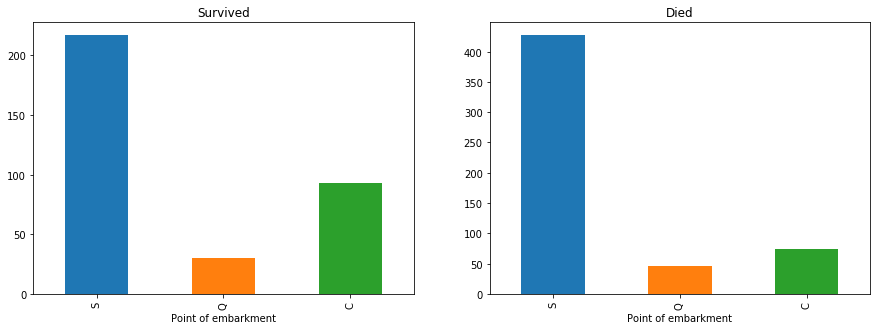

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2,1)
fig1 = survived['Embarked'].value_counts(sort=False).plot.bar()
fig1.set_title("Survived")
fig1.set_xlabel("Point of embarkment")

plt.subplot(1, 2, 2)
fig1 = died['Embarked'].value_counts(sort=False).plot.bar()
fig1.set_title("Died")
fig1.set_xlabel("Point of embarkment")

plt.show(fig)

More than half of the passengers that embarked from zone C survived.

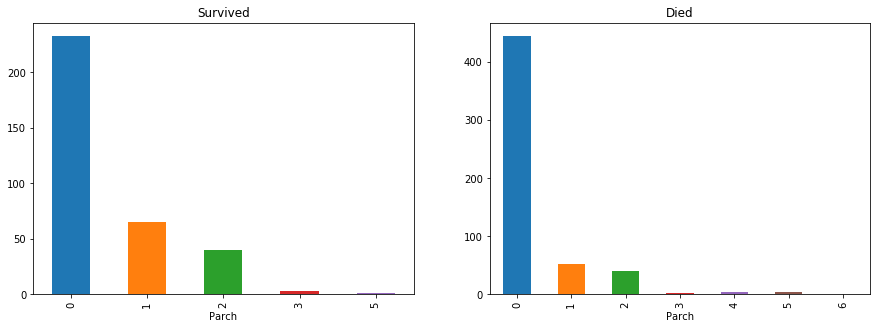

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2,1)
fig1 = survived['Parch'].value_counts(sort=False).plot.bar()
fig1.set_title("Survived")
fig1.set_xlabel("Parch")

plt.subplot(1, 2, 2)
fig1 = died['Parch'].value_counts(sort=False).plot.bar()
fig1.set_title("Died")
fig1.set_xlabel("Parch")

plt.show(fig)

In [18]:
died['Parch'].value_counts()

0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

In [19]:
survived['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

More than half of the passengers with 1 parent or child survived.(perhaps )
Around half of the pasengers with 2 parents or childs survived.(perhaps most are kids)

In [20]:
titanic[titanic['Embarked'].isnull()]
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
titanic["Cabin_specified"] = titanic["Cabin"].isnull()
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN